# Brain Tumour Detection Project 
Nadia Radwan - Computer Science Final Project

Dataset: https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection

# Import packages

In [1]:
#helpful in organizing data into arrays and computing numerical information
import numpy as np
#Used to make deep neural networks 
import torch
from torch.utils.data import Dataset, DataLoader, ConcatDataset
#allows to go through a directory
import glob
#library for visualizing results 
import matplotlib.pyplot as plt
#provides functionalities to evaluate the performance of the machine learning model 
from sklearn.metrics import confusion_matrix, accuracy_score
import random
#gives ability read multi-channel/one channel images 
import cv2
#provides accesss to variables/functions that interact with parts of the Python runtime environment 
import sys

## Reading the Images

In [2]:
#reading tumor images
tumor = []
#define the path as to where to find the images with a tumor
path = './Brain_Tumor_Detection/yes/*.jpg'
for f in glob.iglob(path):
    #read each image from the yes file and resizes it to a certain dimension (inches)
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    #ensure the packages read each channel (Red Green Blue) in the same order for uniformity (RGB is the common convention in ML)
    b, g, r = cv2.split(img)
    img = cv2.merge([r,g,b])
    tumor.append(img)

In [3]:
#reading healthy images
healthy = []
#find path to these images 
path = './Brain_Tumor_Detection/no/*.jpg'
for f in glob.iglob(path):
    #read each image, resize it, and order each of the channels in RGB convention 
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128)) 
    b, g, r = cv2.split(img)
    img = cv2.merge([r,g,b])
    healthy.append(img)

Checkpoint 1 Tests

In [4]:
#check if the tumor loop part works (did the program read all the images?)
len(tumor)

1500

In [5]:
#print the height, width of the tumor images, and how many channels it has
#these images are going to go through a neural network, so we have to check if all dimensions are fixed
for img in tumor:
    print(img.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [6]:
#check if the healthy loop part works (did the program read all the images?)
len(healthy)

1500

In [7]:
#print the height, width of the healthy images, and how many channels it has
#these images are going to go through a neural network, so we have to check if all dimensions are fixed
for img in healthy:
    print(img.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

## Convert the Lists into NumPy Arrays

In [8]:
#converting the healthy and tumor tuples into arrays
healthy = np.array(healthy)
tumor = np.array(tumor)
All = np.concatenate((healthy, tumor))

Checkpoint 2 Tests

In [9]:
#Now that we have converted the tuples into an array, when asked for the dimensionality, it immediately gives you the shape
#of all images along with the number of data points
healthy.shape

(1500, 128, 128, 3)

In [10]:
tumor.shape

(1500, 128, 128, 3)

In [11]:
#check the shape of the images we have in total 
All.shape

(3000, 128, 128, 3)

# Visualizing Brain MRI Images

In [12]:
#function to plot 5 random images from each category
def plot_random(healthy, tumor, num=5):
    #Here, we take the first element from the healthy tuple (91) 
    #this will indicate that we need images that have an index that lie within this range (0-90)
    #then, generate 5 images within that range
    #lastly, we don't want any of the indices to be repeated 
    healthy_imgs = healthy[np.random.choice(healthy.shape[0], num, replace=False)]
    #do the same for the tumor array 
    tumor_imgs = tumor[np.random.choice(tumor.shape[0], num, replace=False)]
    
    #set the figure size for the whole presentation of all images
    plt.figure(figsize=(16,9))
    
    #for loop to divide the whole plot into 5 columns, 1 row for the healthy images
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('healthy')
        plt.imshow(healthy_imgs[i])
    #same thing for tumor images   
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('tumor')
        plt.imshow(tumor_imgs[i])
        
        

    

Checkpoint 3 Tests

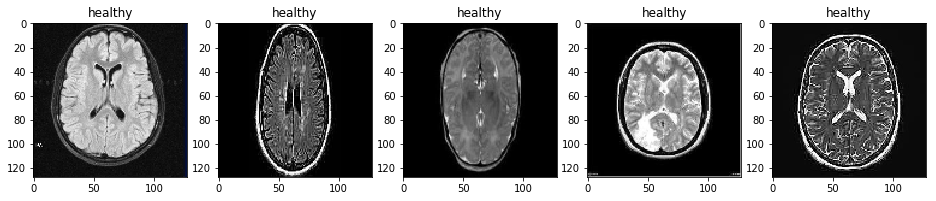

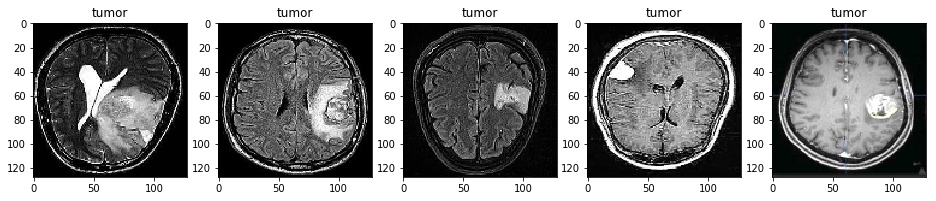

In [13]:
#call the function 
plot_random(healthy, tumor)

 # Create Torch Dataset Class

## What is Pytorch's Abstract Dataset Class?

In [14]:
#Dataset classes helps store the data and create functionalities for it (shuffling, sampling etc..)
#It helps create custom datasets tailored to the project's needs (how data is read, transformed, returned)



#creating a parent dataset class
class Dataset(object):
#dunder functions -- also known as magic functions and are used to provide special behaviour and override built in operations 
#for Python objects

#function to retrieve a certain datapoint from an index in the data
    def __getitem__(self, index):
        raise NotImplementedError
#get length of dataset
    def __len__(self):
        raise NotImplementedError
#adding strings/numbers
    def __add__(self, other):
        return ConcatDataset([self, other])

## Creating MRI custom dataset class 

In [15]:


class MRI(Dataset):
    #creating a constructor 
    #load the data from the directories and seperate it into brain/tumour categories and put all of them together
    def __init__(self):
        
        tumor = []
        healthy = []
        # cv2 - It reads in BGR format by default, so we have to seperate the channels and merge them in an RGB format 
        #as well as resize each of the images 
        for f in glob.iglob("./Brain_Tumor_Detection/yes/*.jpg"):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128)) 
            b, g, r = cv2.split(img)
            img = cv2.merge([r,g,b])
            img = img.reshape((img.shape[2],img.shape[0],img.shape[1])) # We order the dimensions in channels,h, w
            #otherwise the shape will be (h,w,#channels)
            tumor.append(img)

            #do tehe same thing for the tumour dataset
        for f in glob.iglob("./Brain_Tumor_Detection/no/*.jpg"):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128)) 
            b, g, r = cv2.split(img)
            img = cv2.merge([r,g,b])
            img = img.reshape((img.shape[2],img.shape[0],img.shape[1]))
            healthy.append(img)

        # our images
        tumor = np.array(tumor,dtype=np.float32)
        healthy = np.array(healthy,dtype=np.float32)
        
        # our labels
        #we are insisting for the machine to learn to predict values close to zeros that are healthy, 
        #and predict values close to one that have a tumour
        tumor_label = np.ones(tumor.shape[0], dtype=np.float32) #represent the tumour class with one
        healthy_label = np.zeros(healthy.shape[0], dtype=np.float32) #represent the healthy class with zero 
        
        # Concatenate images and labels as one array
        self.images = np.concatenate((tumor, healthy), axis=0)
        self.labels = np.concatenate((tumor_label, healthy_label))
        
#overriding the len functionality
#we consider the length of the dataset object as the number of images we have
    def __len__(self):
        return self.images.shape[0]
    
#overriding the get item functionality 
#we need to be able to get an image and know its label (tumour/non-tumour)
    def __getitem__(self, index):
        sample = {'image': self.images[index], 'label':self.labels[index]}
        
        return sample
 #creating a function to normalize between zero and one    
    def normalize(self):
        
        self.images = self.images/255.0

Checkpoint 4 Tests

In [16]:
#checking that we have all images 

mri = MRI()
len(mri)

3000

In [17]:
mri.normalize()

In [18]:
mri[5]

{'image': array([[[0.        , 0.        , 0.        , ..., 0.00392157,
          0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
          0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157, ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.14901961, 0.14901961, 0.1882353 , ..., 0.01960784,
          0.01960784, 0.01960784],
         [0.01960784, 0.01960784, 0.01960784, ..., 0.36078432,
          0.3529412 , 0.3529412 ],
         [0.3529412 , 0.34509805, 0.34509805, ..., 0.19607843,
          0.19607843, 0.14509805]],
 
        [[0.14509805, 0.14509805, 0.20784314, ..., 0.01960784,
          0.01960784, 0.01960784],
         [0.02745098, 0.02745098, 0.02745098, ..., 0.3647059 ,
          0.3764706 , 0.3764706 ],
         [0.3764706 , 0.35686275, 0.35686275, ..., 0.10196079,
          0.10196079, 0.24705882],
         ...,
         [0.3529412 , 0.3372549 , 0.3372549 , ..., 0.3529412 ,
          0.352

In [19]:
img = mri[5]['image']

In [20]:
img.shape

(3, 128, 128)

In [21]:
np.max(img)

1.0

In [22]:
np.min(img)

0.0

In [23]:
mri_dataset = MRI()
mri_dataset.normalize()

# Creating a dataloader

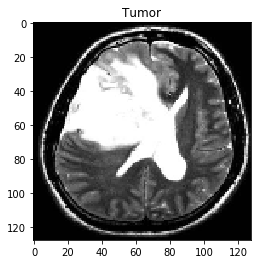

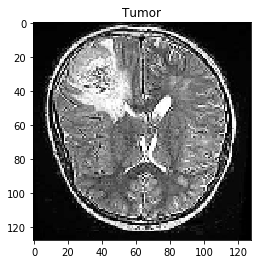

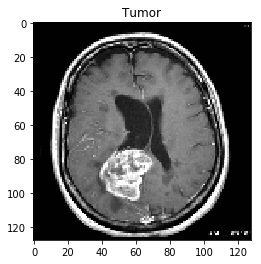

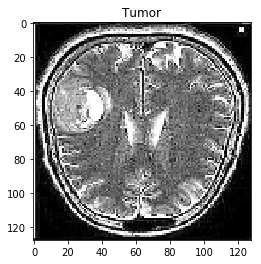

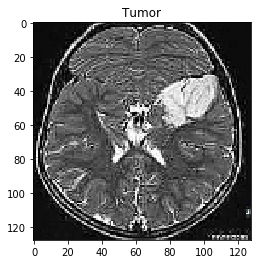

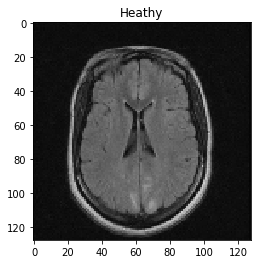

In [24]:
# Creating a dataloader is one way of iterating through the data, shuffle the data, cut it up into minibatches 
names={0:'Heathy', 1:'Tumor'}
dataloader = DataLoader(mri_dataset, shuffle=True)
for i, sample in enumerate(dataloader):
    img = sample['image'].squeeze()
    img = img.reshape((img.shape[1], img.shape[2], img.shape[0]))
    plt.title(names[sample['label'].item()])
    plt.imshow(img)
    plt.show()
    if i == 5:
        break

# Create a model

In [25]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.cnn_model = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=5),
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=5))
        
        self.fc_model = nn.Sequential(
        nn.Linear(in_features=256, out_features=120),
        nn.Tanh(),
        nn.Linear(in_features=120, out_features=84),
        nn.Tanh(),
        nn.Linear(in_features=84, out_features=1))
        
    def forward(self, x):
        #passing the data through the CNN    
        x = self.cnn_model(x)
        #flattens data
        x = x.view(x.size(0), -1)
        #passes result into all of the fully connected  layers 
        x = self.fc_model(x)
        #crushes result between 0 and 1 
        x = torch.sigmoid(x)
        
        return x
            

The parameters of the model - Checkpoint Tests 5

In [26]:
model = CNN()

In [27]:
model

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [28]:
model.cnn_model

Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): Tanh()
  (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Tanh()
  (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
)

In [29]:
model.cnn_model[0]

Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))

In [30]:
model.cnn_model[0].weight

Parameter containing:
tensor([[[[ 9.8229e-02, -5.8757e-02, -6.7558e-02,  4.6795e-02,  3.8313e-02],
          [ 1.3937e-02, -8.4320e-02,  7.7920e-02,  1.4627e-02, -4.8282e-02],
          [-1.6810e-02, -6.7522e-02, -1.2321e-02, -6.7323e-03, -3.1547e-02],
          [ 9.2620e-02, -1.0041e-01, -5.9188e-02, -9.3031e-02,  4.7283e-02],
          [-3.7098e-02, -1.1239e-01,  1.0318e-01,  1.6010e-02, -5.8673e-02]],

         [[-1.0334e-01,  1.1193e-01,  1.1588e-02,  6.5443e-02, -1.3499e-02],
          [ 2.3374e-03,  2.4251e-02, -9.0792e-02, -1.4879e-02,  9.3625e-02],
          [ 9.9843e-02, -3.1427e-02, -8.0519e-02,  6.5858e-02,  6.4026e-02],
          [ 8.2025e-02, -6.5992e-02,  1.1478e-02,  9.4630e-02, -4.9255e-02],
          [-7.8090e-02, -7.8490e-02,  8.2534e-02,  9.0463e-02,  2.0161e-02]],

         [[ 4.9809e-02, -3.5775e-02, -2.7586e-02,  7.1314e-02,  3.8164e-02],
          [-1.1077e-01, -6.8748e-02, -3.9097e-02, -4.3943e-02, -2.4083e-02],
          [-8.3231e-02,  4.7271e-02,  8.5044e-02, 

In [31]:
model.cnn_model[0].weight.shape

torch.Size([6, 3, 5, 5])

In [32]:
model.cnn_model[0].weight[0]

tensor([[[ 0.0982, -0.0588, -0.0676,  0.0468,  0.0383],
         [ 0.0139, -0.0843,  0.0779,  0.0146, -0.0483],
         [-0.0168, -0.0675, -0.0123, -0.0067, -0.0315],
         [ 0.0926, -0.1004, -0.0592, -0.0930,  0.0473],
         [-0.0371, -0.1124,  0.1032,  0.0160, -0.0587]],

        [[-0.1033,  0.1119,  0.0116,  0.0654, -0.0135],
         [ 0.0023,  0.0243, -0.0908, -0.0149,  0.0936],
         [ 0.0998, -0.0314, -0.0805,  0.0659,  0.0640],
         [ 0.0820, -0.0660,  0.0115,  0.0946, -0.0493],
         [-0.0781, -0.0785,  0.0825,  0.0905,  0.0202]],

        [[ 0.0498, -0.0358, -0.0276,  0.0713,  0.0382],
         [-0.1108, -0.0687, -0.0391, -0.0439, -0.0241],
         [-0.0832,  0.0473,  0.0850,  0.0453,  0.1025],
         [-0.0727, -0.0721,  0.0687,  0.0578, -0.0218],
         [-0.0725,  0.0354,  0.0801, -0.1005, -0.0523]]],
       grad_fn=<SelectBackward>)

In [33]:
model.cnn_model[0].weight[0].shape

torch.Size([3, 5, 5])

In [34]:
model.cnn_model[0].weight[0][0]

tensor([[ 0.0982, -0.0588, -0.0676,  0.0468,  0.0383],
        [ 0.0139, -0.0843,  0.0779,  0.0146, -0.0483],
        [-0.0168, -0.0675, -0.0123, -0.0067, -0.0315],
        [ 0.0926, -0.1004, -0.0592, -0.0930,  0.0473],
        [-0.0371, -0.1124,  0.1032,  0.0160, -0.0587]],
       grad_fn=<SelectBackward>)

Linear layer

In [35]:
model.fc_model

Sequential(
  (0): Linear(in_features=256, out_features=120, bias=True)
  (1): Tanh()
  (2): Linear(in_features=120, out_features=84, bias=True)
  (3): Tanh()
  (4): Linear(in_features=84, out_features=1, bias=True)
)

In [36]:
model.fc_model[0]

Linear(in_features=256, out_features=120, bias=True)

In [37]:
model.fc_model[0].weight.shape

torch.Size([120, 256])

What is x.view(x.size(0),-1)?

In [38]:
x = torch.tensor([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

In [39]:
x  = x.reshape((2,2,2,2))

In [40]:
x

tensor([[[[ 1,  2],
          [ 3,  4]],

         [[ 5,  6],
          [ 7,  8]]],


        [[[ 9, 10],
          [11, 12]],

         [[13, 14],
          [15, 16]]]])

In [41]:
x.size()

torch.Size([2, 2, 2, 2])

In [42]:
x.size(0)

2

In [43]:
#flattens x 
x.view(x.size(0),-1)

tensor([[ 1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16]])

In [44]:
# device will be 'cuda' if a GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# creating a CPU tensor
cpu_tensor = torch.rand(10).to(device)
# moving same tensor to GPU
gpu_tensor = cpu_tensor.to(device)

print(cpu_tensor, cpu_tensor.dtype, type(cpu_tensor), cpu_tensor.type())
print(gpu_tensor, gpu_tensor.dtype, type(gpu_tensor), gpu_tensor.type())

print(cpu_tensor*gpu_tensor)

tensor([0.0039, 0.0947, 0.9511, 0.0593, 0.6780, 0.3071, 0.5162, 0.9154, 0.0965,
        0.3322]) torch.float32 <class 'torch.Tensor'> torch.FloatTensor
tensor([0.0039, 0.0947, 0.9511, 0.0593, 0.6780, 0.3071, 0.5162, 0.9154, 0.0965,
        0.3322]) torch.float32 <class 'torch.Tensor'> torch.FloatTensor
tensor([1.5511e-05, 8.9733e-03, 9.0453e-01, 3.5185e-03, 4.5969e-01, 9.4331e-02,
        2.6650e-01, 8.3801e-01, 9.3044e-03, 1.1035e-01])


# Evaluate a New-Born Neural Network!

In [45]:
#defining an object of the class
mri_dataset = MRI()
#call the normalize function
mri_dataset.normalize()
#define a device and where to run the CNN (in this case, onto the cpu)
device = torch.device('cpu')
model = CNN().to(device)

In [46]:
#define a dataloader 
dataloader = DataLoader(mri_dataset, batch_size=32, shuffle=False)

In [47]:
#putting the model in test mode 
model.eval()
#keeping track of the raw outputs of the model 
outputs = []
#save the corresponding label value (0 or 1)
y_true = []

#extracting the images and labels from the dictionary they are stored in (we created previously) 
with torch.no_grad():
    for D in dataloader:
        image = D['image'].to(device)
        label = D['label'].to(device)
        
        #pass data through model
        y_hat = model(image)
    
        #convert the variables from the cpu into numpy arrays and add them to the outputs list
        outputs.append(y_hat.cpu().detach().numpy())
        y_true.append(label.cpu().detach().numpy())
    


In [48]:

#concatenate the numpy arrays 

outputs = np.concatenate( outputs, axis=0 ).squeeze()
y_true = np.concatenate( y_true, axis=0 ).squeeze()

In [49]:

#thresholding the value the output has to be for it to be labeled as 'tumour' or 'healthy'

def threshold(scores,threshold=0.50, minimum=0, maximum = 1.0):
    #puts scores into a numpy array
    x = np.array(list(scores))
    #any element that is higher than the threshold (0.5) is assigned '1'(tumour)
    x[x >= threshold] = maximum
    x[x < threshold] = minimum #same for this but with '0' (healthy)
    return x

In [50]:
#evaluating the accuracy of the dumb model 
accuracy_score(y_true, threshold(outputs))

0.5

[Text(0, 0.5, 'Tumor'), Text(0, 1.5, 'Healthy')]

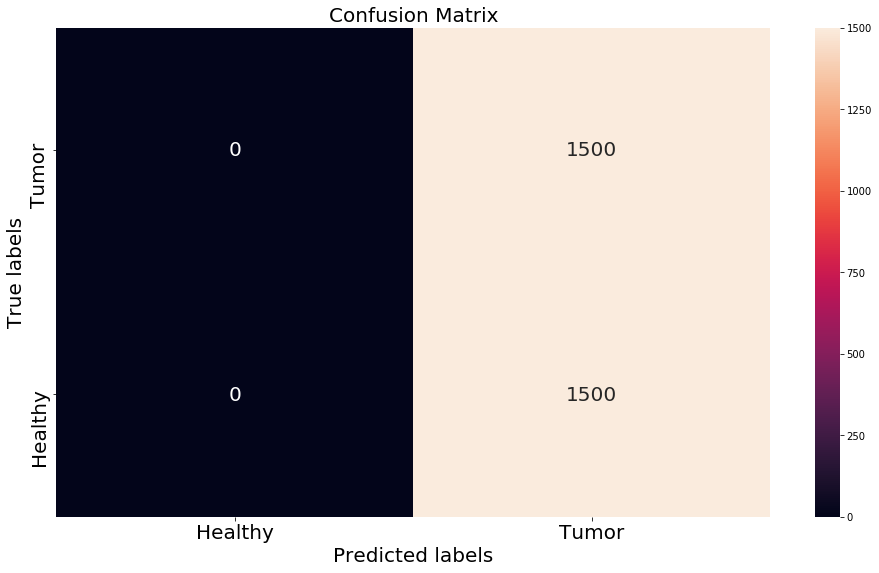

In [51]:
# a better confusion matrix
import seaborn as sns

plt.figure(figsize=(16,9))
cm = confusion_matrix(y_true, threshold(outputs))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={"size": 20})

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=20)
ax.set_ylabel('True labels', fontsize=20) 
ax.set_title('Confusion Matrix', fontsize=20)
ax.xaxis.set_ticklabels(['Healthy','Tumor'], fontsize=20)
ax.yaxis.set_ticklabels(['Tumor','Healthy'], fontsize=20)

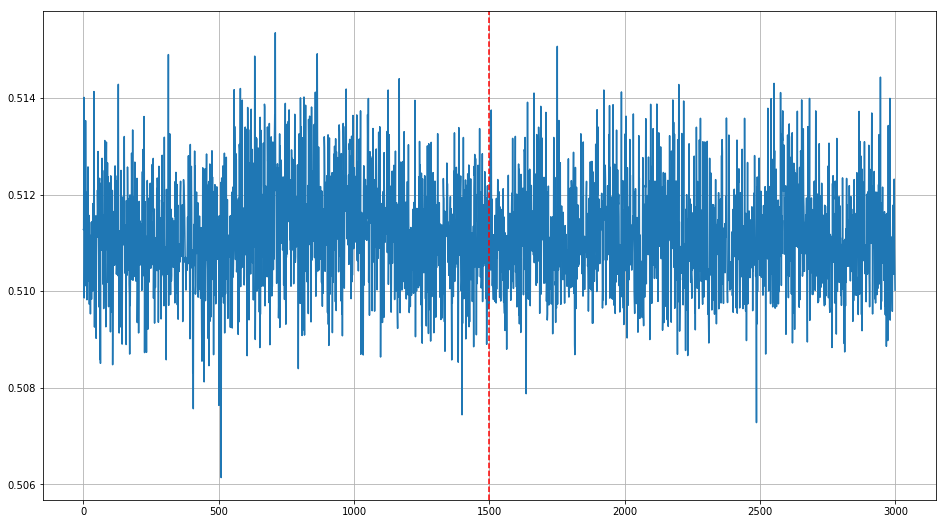

In [52]:
#plotting outputs to see the ranges the model predicted (0-1 values) -- This shows us that it is creating 'noise' -- predictions
#are not accurate

plt.figure(figsize=(16,9))
plt.plot(outputs)
plt.axvline(x=len(tumor), color='r', linestyle='--')
plt.grid()

# Train the dumb model

In [53]:

#defining the learning rate
eta = 0.0001
#defining the epoch value -- an epoch is a single pass through a dataset
EPOCH = 150
#setting optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=eta)
#defining the dataloader
dataloader = DataLoader(mri_dataset, batch_size=32, shuffle=True)
#CNN is going to be in 'train' mode
model.train()
#returns the elements of the model

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [54]:

#creating a loop for our epochs 

for epoch in range(1, EPOCH):
    #keep track of losses of a given epoch 
    losses = []
    #go through all datapoints
    for D in dataloader:
        optimizer.zero_grad()
        data = D['image'].to(device)
        label = D['label'].to(device)
        y_hat = model(data)
        #define loss function
        error = nn.BCELoss() 
        #compute the error
        loss = torch.sum(error(y_hat.squeeze(), label))
        #compute the gradients -- basically finding how much each weight in the network contributes to the error in the output 
        #this helps in adjusting the weights to reduce error 
        loss.backward()
        #update the parameters
        optimizer.step()
        #add to the list of losses and grab the loss value 
        losses.append(loss.item())
    #print losses for every 10 epochs (to save time)
    if (epoch+1) % 10 == 0:
        print('Train Epoch: {}\tLoss: {:.6f}'.format(epoch+1, np.mean(losses)))
        
        #As you can notice, as the machine is training, with every epoch, the loss is decreasing 

Train Epoch: 10	Loss: 0.461116
Train Epoch: 20	Loss: 0.412972
Train Epoch: 30	Loss: 0.369556
Train Epoch: 40	Loss: 0.319985
Train Epoch: 50	Loss: 0.258814
Train Epoch: 60	Loss: 0.197592
Train Epoch: 70	Loss: 0.147838
Train Epoch: 80	Loss: 0.108552
Train Epoch: 90	Loss: 0.084566
Train Epoch: 100	Loss: 0.062232
Train Epoch: 110	Loss: 0.048334
Train Epoch: 120	Loss: 0.035581
Train Epoch: 130	Loss: 0.023697
Train Epoch: 140	Loss: 0.011839
Train Epoch: 150	Loss: 0.021706


In [55]:
 #print the dimensions of the image and label to check if the machine is processing 32 mini batches at a time
        print(y_hat.shape)
        print(label.shape)

torch.Size([24, 1])
torch.Size([24])


# Evaluate a smart model

In [56]:
#evaluating the accuracy of the smart model

model.eval()
dataloader = DataLoader(mri_dataset, batch_size=32, shuffle=False)
outputs=[]
y_true = []
with torch.no_grad():
    for D in dataloader:
        image =  D['image'].to(device)
        label = D['label'].to(device)
        
        y_hat = model(image)
        
        outputs.append(y_hat.cpu().detach().numpy())
        y_true.append(label.cpu().detach().numpy())
        
outputs = np.concatenate( outputs, axis=0 )
y_true = np.concatenate( y_true, axis=0 )

In [57]:

#printing the accuracy score
accuracy_score(y_true, threshold(outputs))

0.9986666666666667

[Text(0, 0.5, 'Tumor'), Text(0, 1.5, 'Healthy')]

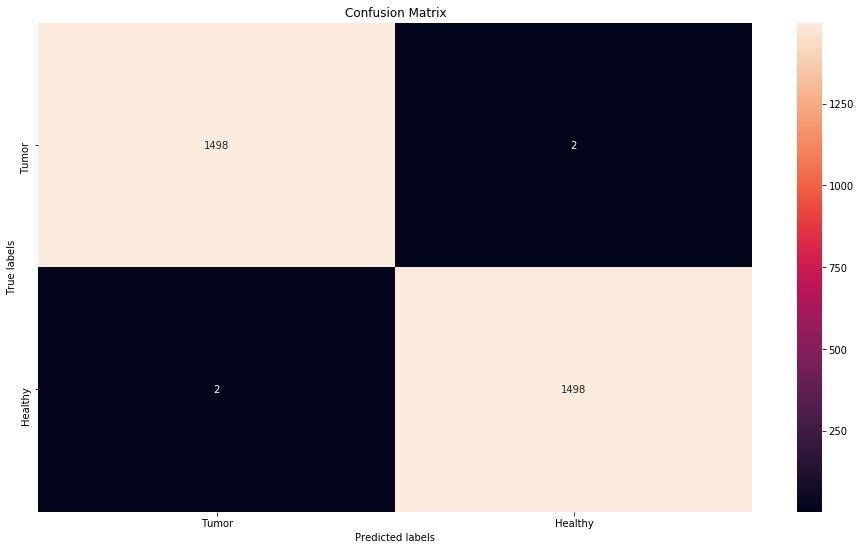

In [58]:
#printing out the confusion matrix

cm = confusion_matrix(y_true, threshold(outputs))
plt.figure(figsize=(16,9))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Tumor','Healthy'])
ax.yaxis.set_ticklabels(['Tumor','Healthy'])

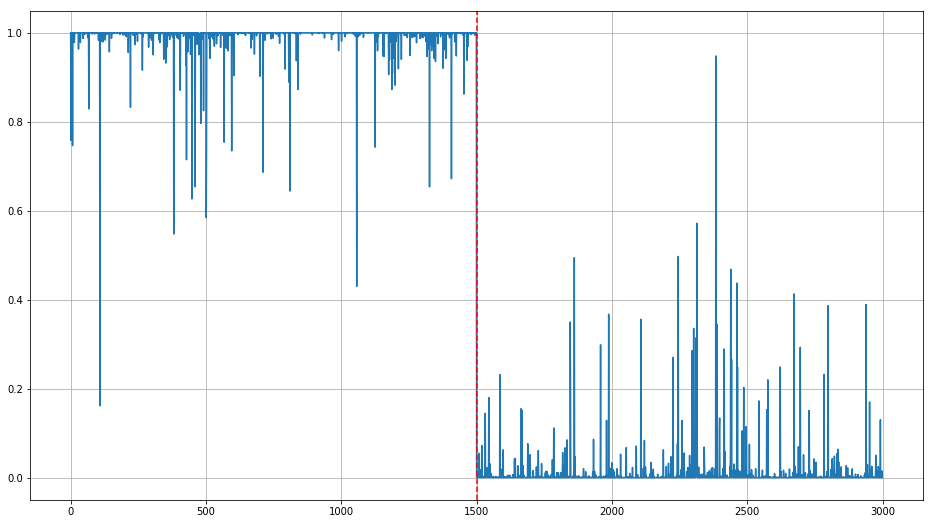

In [59]:
#plotting the raw outputs

#as you can see, it produces numbers that are very close to one for images it thinks have tumours, 
#and numbers very close to zero for images that it thinks are healthy
#unlike the graph with the dumb model, the raw outputs are not 'noisy' -- not all over the place

#the machine has learned to seperate outputs depending on whether it's dealing with tumour/healthy images

plt.figure(figsize=(16,9))
plt.plot(outputs)
plt.axvline(x=len(tumor), color='r', linestyle='--')
plt.grid()

# Visualising the Feature Maps of the Convolutional Filters

In [60]:
#looking at the layers of the CNN

model

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [61]:


no_of_layers = 0
conv_layers = []

In [62]:
#going through the components of each layer in the CNN


model_children = list(model.children())
model_children

[Sequential(
   (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
   (1): Tanh()
   (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
   (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
   (4): Tanh()
   (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
 ), Sequential(
   (0): Linear(in_features=256, out_features=120, bias=True)
   (1): Tanh()
   (2): Linear(in_features=120, out_features=84, bias=True)
   (3): Tanh()
   (4): Linear(in_features=84, out_features=1, bias=True)
 )]

In [63]:
#iterating through the "children" (the immediate child modules of the model -- listing convolutional layers, fully connected layers, and maz pooling layers)

for child in model_children:
    if type(child) == nn.Sequential:
        #look at each layer in each child
        for layer in child.children():
            #if that layer is convolutional,record it and increment the number of layers counted 
            if type(layer) == nn.Conv2d:
                no_of_layers += 1
                conv_layers.append(layer)

In [64]:
#we end up with 2 convulutional layers 

conv_layers

[Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1)),
 Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))]

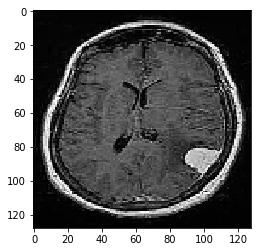

In [65]:



img = mri_dataset[100]['image']
plt.imshow(img.reshape(128,128,3))

In [66]:
img = torch.from_numpy(img).to(device)

In [67]:
img.shape

torch.Size([3, 128, 128])

In [68]:
img = img.unsqueeze(0)
img.shape

torch.Size([1, 3, 128, 128])

In [69]:
#defining a list to hold the feature maps 

#pass image to first convolutional layer
results = [conv_layers[0](img)]


#what we are doing is that we grab this image and convolve all 6 filters of the first convolutional layer against this image 
#and produces 6 feature maps 


#for loop for the second convolutional layer
for i in range(1, len(conv_layers)):
    #add to the results the feature map of each convolutional layer (in this case only 1) that we observe through this list 
    results.append(conv_layers[i](results[-1]))
outputs = results

Layer  1


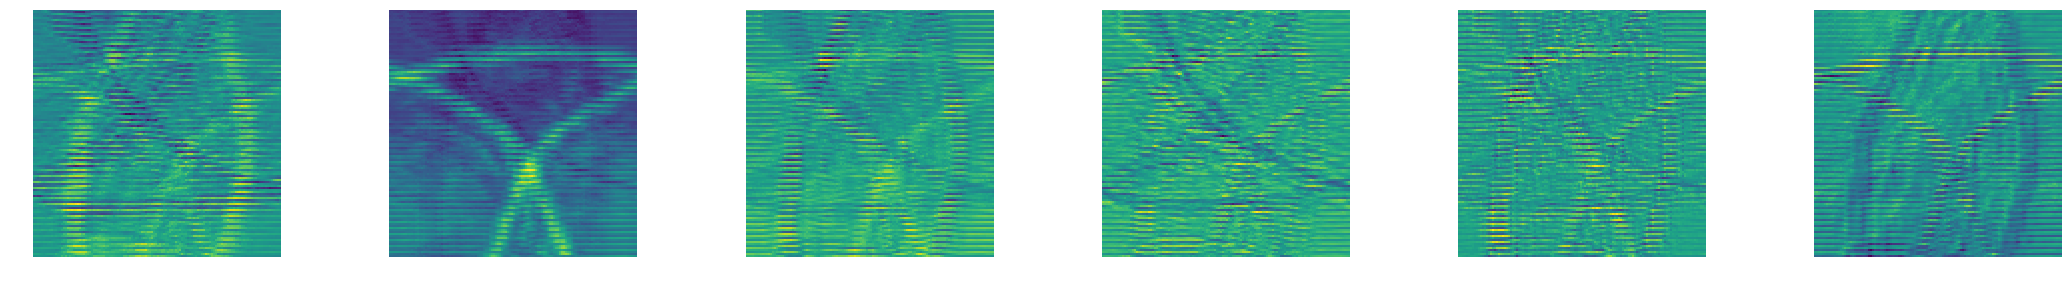

Layer  2


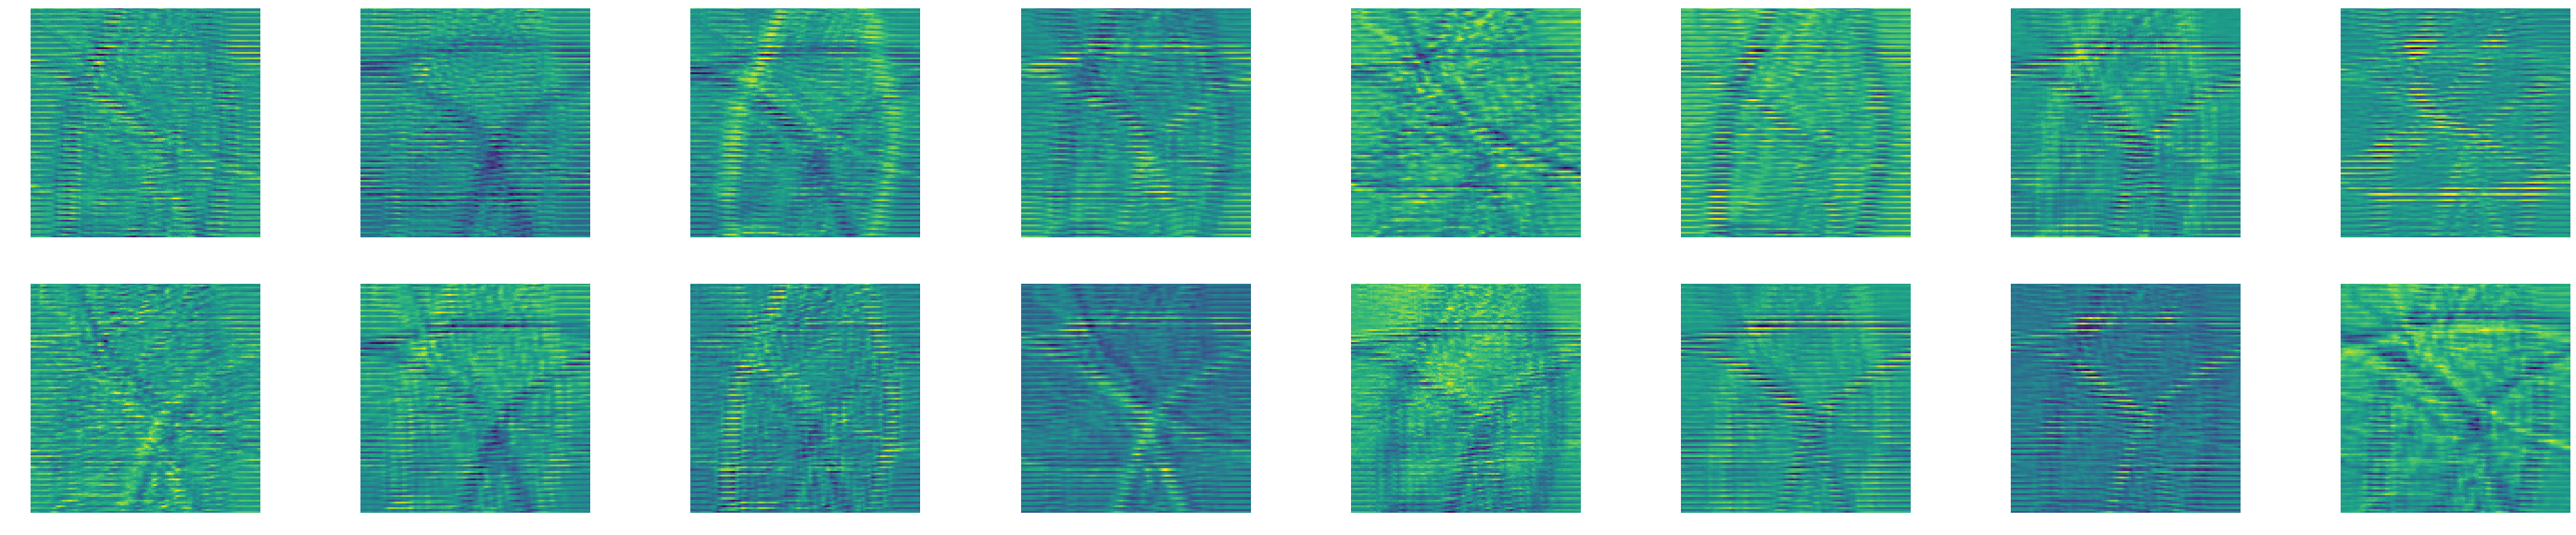

In [70]:
#go through the outputs and visualize them 
#create a figure for each layer
for num_layer in range(len(outputs)):
    plt.figure(figsize=(50, 10))
    layer_viz = outputs[num_layer].squeeze()
    print("Layer ",num_layer+1)
    for i, f in enumerate(layer_viz):
        #create subplots to print each feature map 
        plt.subplot(2, 8, i + 1)
        plt.imshow(f.detach().cpu().numpy())
        plt.axis("off")
    plt.show()
    plt.close()
    
    
    #prints what the filters were looking through -- what pattenrs they are looking for -- brighter the colour
    #, the more the filter is looking through

# Are We Over-fitting?

## Preparing a validation set: We need to change the MRI dataset slightly!

We will need to make changes to our **MRI dataset class**:

- Define a function to divide the data into train and validation sets
- Define a variable called **mode** to determine whether we are interested in the training OR validation data
- Change __len()__ and __getitem__() functions and conditioned over the variable **mode**

In [71]:
# Import train/test split function from sklearn
from sklearn.model_selection import train_test_split

In [72]:
class MRI(Dataset):
    
    def __init__(self):
        
        # Variables to hold the Training data and Validation data
        self.X_train, self.y_train, self.X_val, self.y_val = None, None, None, None
        
        # A variable to determine if we are interested in retrieving the training OR the validation data
        self.mode = 'train'
        
        tumor = []
        healthy = []
        # cv2 - It reads in BGR format by default
        for f in glob.iglob("./Brain_Tumor_Detection/yes/*.jpg"):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128)) 
            b, g, r = cv2.split(img)
            img = cv2.merge([r,g,b])
            img = img.reshape((img.shape[2],img.shape[0],img.shape[1])) # otherwise the shape will be (h,w,#channels)
            tumor.append(img)

        for f in glob.iglob("./Brain_Tumor_Detection/no/*.jpg"):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128)) 
            b, g, r = cv2.split(img)
            img = cv2.merge([r,g,b])
            img = img.reshape((img.shape[2],img.shape[0],img.shape[1]))
            healthy.append(img)

        # our images
        tumor = np.array(tumor,dtype=np.float32)
        healthy = np.array(healthy,dtype=np.float32)
        
        # our labels
        tumor_label = np.ones(tumor.shape[0], dtype=np.float32)
        healthy_label = np.zeros(healthy.shape[0], dtype=np.float32)
        
        # Concatenates
        self.images = np.concatenate((tumor, healthy), axis=0)
        self.labels = np.concatenate((tumor_label, healthy_label))
    
    # Define a function that would separate the data into Training and Validation sets
    def train_val_split(self):
        self.X_train, self.X_val, self.y_train, self.y_val = \
        train_test_split(self.images, self.labels, test_size=0.20, random_state=42)
        
    def __len__(self):
        # Use self.mode to determine whether train or val data is of interest
        if self.mode == 'train':
            return self.X_train.shape[0]
        elif self.mode == 'val':
            return self.X_val.shape[0]
    
    def __getitem__(self, idx):
        # Use self.mode to determine whether train or val data is of interest
        if self.mode== 'train':
            sample = {'image': self.X_train[idx], 'label': self.y_train[idx]}
        
        elif self.mode== 'val':
            sample = {'image': self.X_val[idx], 'label': self.y_val[idx]}
        
        return sample
    
    def normalize(self):
        self.images = self.images/255.0

# Are we overfitting?

In [73]:


#creating an object of the class

mri_dataset = MRI()
mri_dataset.normalize()

#spliting the data 
mri_dataset.train_val_split()

In [74]:

#create necessary dataloaders

train_dataloader = DataLoader(mri_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(mri_dataset, batch_size=32, shuffle=False)

In [75]:
#putting the model on the cpu

device = torch.device("cpu")
model = CNN().to(device)

In [76]:
#defining the learning rate and optimizer
eta=0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=eta)

In [77]:
# keep track of epoch losses (training and validation)
epoch_train_loss = []
epoch_val_loss = []

In [78]:

for epoch in range(1,300):
    #keep track of losses of each of the data samples
    train_losses = []
    # train for the current epoch
    model.train()
    #retrieve data only from the training portions 
    mri_dataset.mode = 'train'
    for D in train_dataloader:
        # Train the model
        optimizer.zero_grad()
        #get data from image and label
        data = D['image'].to(device)
        label = D['label'].to(device)
        #pass into model
        y_hat = model(data)
        #compute the loss
        error = nn.BCELoss()
        loss = torch.sum(error(y_hat.squeeze(), label))
        loss.backward()
        optimizer.step()
        #put the loss into our train losses 
        train_losses.append(loss.item())
    # aggregate the train losses and put them into our epoch train loss
    epoch_train_loss.append(np.mean(train_losses))
    
    # validate for the current epoch
    val_losses = []
    model.eval()
    
    #get only the validation part of the dataset 
    mri_dataset.mode = 'val'
    
    with torch.no_grad():
        for D in val_dataloader: 
            
            #same as previous loop, just with the validation set
            data = D['image'].to(device)
            label = D['label'].to(device)
            y_hat = model(data)
            error = nn.BCELoss()
            loss = torch.sum(error(y_hat.squeeze(), label))
            val_losses.append(loss.item())
    
    epoch_val_loss.append(np.mean(val_losses))
    
    
    #print train and validation losses for every 10 epochs
    if (epoch+1) % 10 == 0:
        print('Train Epoch: {}\tTrain Loss: {:.6f}\tVal Loss: {:.6f}'.format(epoch+1, np.mean(train_losses),np.mean(val_losses)))
    

Train Epoch: 10	Train Loss: 0.453673	Val Loss: 0.527062
Train Epoch: 20	Train Loss: 0.405097	Val Loss: 0.495378
Train Epoch: 30	Train Loss: 0.364043	Val Loss: 0.469189
Train Epoch: 40	Train Loss: 0.325369	Val Loss: 0.447992
Train Epoch: 50	Train Loss: 0.279818	Val Loss: 0.425163
Train Epoch: 60	Train Loss: 0.237165	Val Loss: 0.387291
Train Epoch: 70	Train Loss: 0.192721	Val Loss: 0.355780
Train Epoch: 80	Train Loss: 0.155844	Val Loss: 0.329307
Train Epoch: 90	Train Loss: 0.122207	Val Loss: 0.299904
Train Epoch: 100	Train Loss: 0.099800	Val Loss: 0.290144
Train Epoch: 110	Train Loss: 0.087770	Val Loss: 0.305447
Train Epoch: 120	Train Loss: 0.064815	Val Loss: 0.326838
Train Epoch: 130	Train Loss: 0.054297	Val Loss: 0.310561
Train Epoch: 140	Train Loss: 0.044433	Val Loss: 0.461557
Train Epoch: 150	Train Loss: 0.032490	Val Loss: 0.472881
Train Epoch: 160	Train Loss: 0.023861	Val Loss: 0.484532
Train Epoch: 170	Train Loss: 0.016452	Val Loss: 0.892192
Train Epoch: 180	Train Loss: 0.007981	Va

Text(0, 0.5, 'Loss')

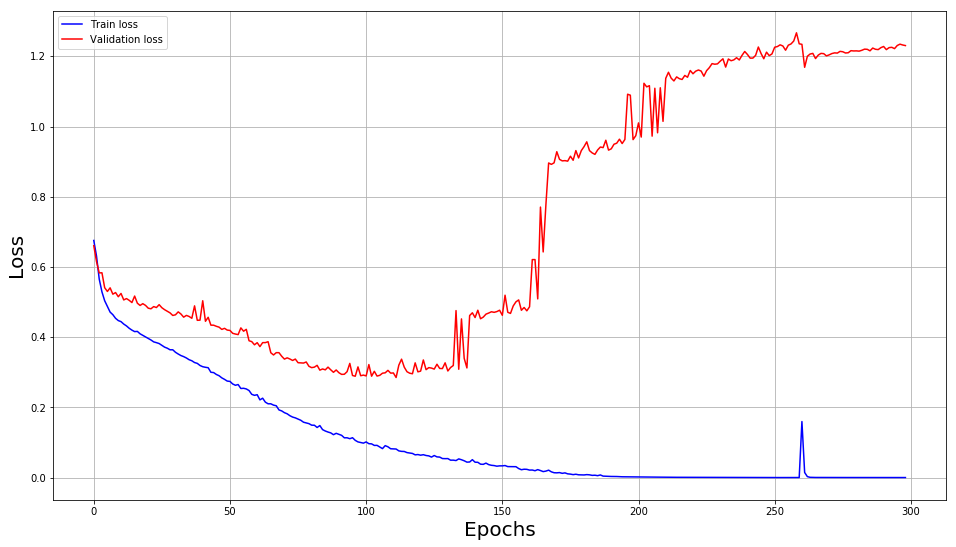

In [79]:

#visualize the losses

plt.figure(figsize=(16,9))
plt.plot(epoch_train_loss, c='b', label='Train loss')
plt.plot(epoch_val_loss, c='r', label = 'Validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)



